## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [55]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?

(ii) How strong is the relationship between the predictor and the response?

(iii) Is the relationship between the predictor and the response positive or negative?

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [7]:
# y = Auto['mpg']
# X = MS['horsepower'].fit_transform(Auto)
# model = sm.OLS(y, X)
# results = model.fit()
# summarize(results) 

model = sm.OLS.from_formula('mpg ~ horsepower', data=Auto)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           7.03e-81
Time:                        14:34:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

i. There is a clear relationship between the horsepower and the mpg, p value of the predictor is very low, F-statistic is much larger than 1, its std is small and the confidence interval of horsepower does not contain 0: [-0.171, -0.145]. We can confidently reject the null hypothesis that the regression coefficient of horsepower is zero.

ii. As R-square = 0.606, we can state that about 60 percent of the variance in the response (mpg) can be explained by the horsepower.

iii. The relationship between horsepower vs mpg is negative as the regression coefficient is -0.1578

iv. According to the analysis below, the prediction for 98 horsepower is mpg = 24.467 with 95 percent confidence interval = [23.97, 24.96] and prediction interval = [14.81,34.12]

In [8]:
predict_df = pd.DataFrame({'constant': [1.0] ,'horsepower': [98.0]})

In [9]:
predict_df.head()

,constant,horsepower
0,1.0,98.0


In [23]:
predictions = result.get_prediction(predict_df)

# print(f' Predicted value of Miles per Gallon for 98 horsepower is: {predictions.predicted_mean[0]:.2f}')


print("{:.2f}".format(predictions.predicted_mean[0]))

24.47


In [26]:
# print(f' 95 % Confidence interval is : {predictions.conf_int(alpha=0.05)[0]}')

print(predictions.conf_int(alpha=0.05)[0])

[23.97307896 24.96107534]


In [28]:
# print(f' 95 % Prediction interval is : {predictions.conf_int(obs = True, alpha=0.05)[0]}')

print(predictions.conf_int(obs = True, alpha=0.05)[0])

[14.80939607 34.12475823]


_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

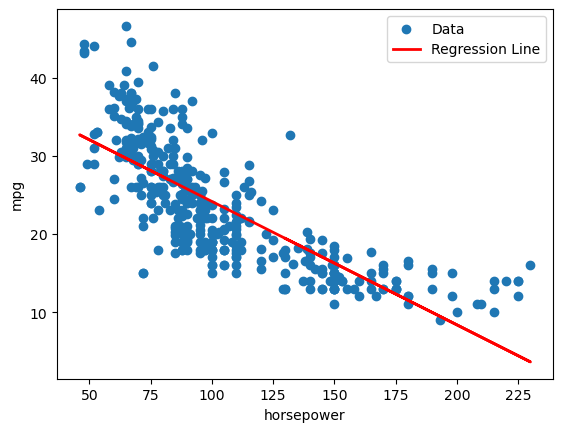

In [33]:

mpg = Auto['mpg']
horsepower = Auto['horsepower']

horsepower_reshaped = horsepower.values.reshape(-1, 1)

lm_mpg_horsepower = LinearRegression()
lm_mpg_horsepower.fit(horsepower_reshaped, mpg)

plt.scatter(horsepower, mpg, label='Data')
plt.xlabel('horsepower')
plt.ylabel('mpg')

plt.plot(horsepower, lm_mpg_horsepower.predict(horsepower_reshaped), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

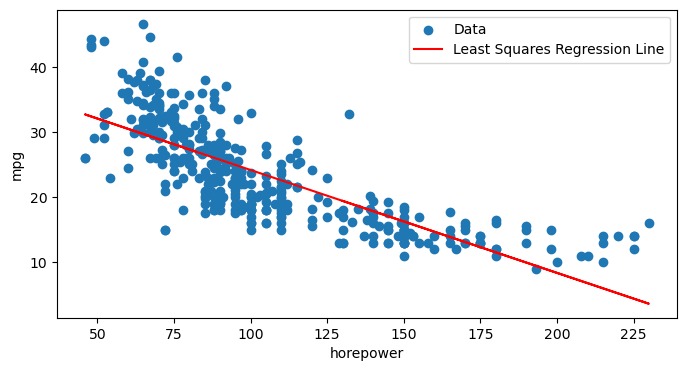

In [44]:
model = sm.OLS.from_formula('mpg ~ horsepower', data=Auto)
result = model.fit()

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


ax.scatter(horsepower, mpg, label='Data')
ax.set_xlabel('horepower')
ax.set_ylabel('mpg')

ax.plot(horsepower, result.predict(sm.add_constant(horsepower)), color='red', label='Least Squares Regression Line')

plt.legend()
plt.show()

_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

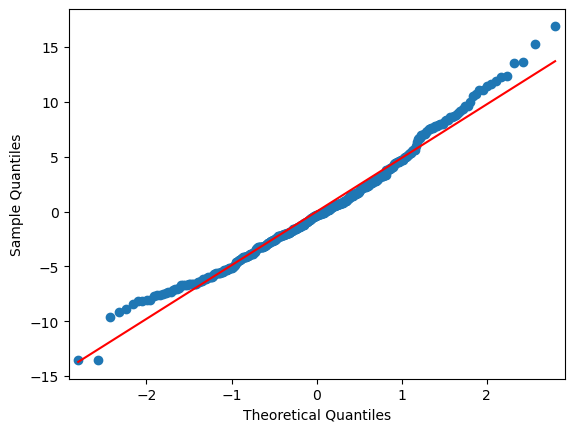

In [63]:
# QQ Plot
sm.qqplot(result.resid, line='s');

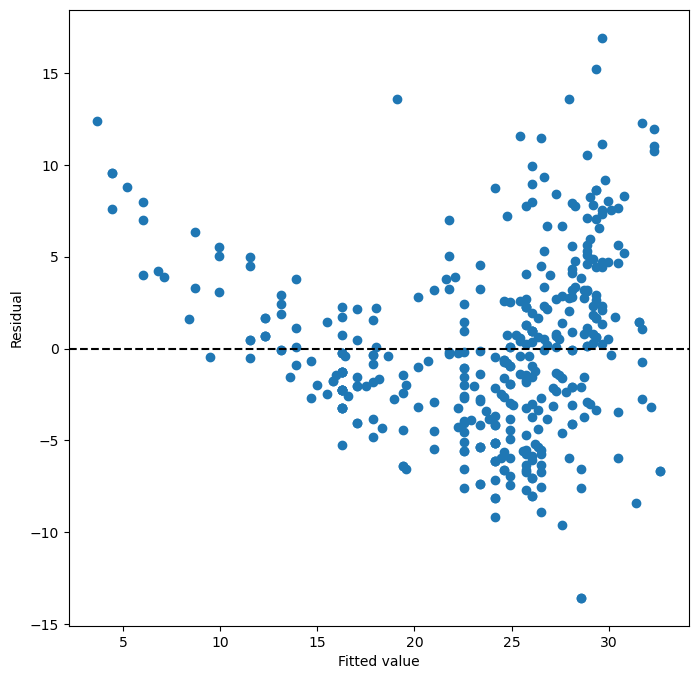

In [68]:
# Residuals v Fitted values Plot
ax = subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

Additional Practice Questions: 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show? 
- Can you think of a business context where this exercise would have applications?